Import mandatory libraries

In [1]:
import numpy as np
import math
import data
import random
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.special

0. NN prep
Here we define the model of our network as well as the sigmoid, softmax activation and loss functions

In [2]:
def init_parameters(w1=[[1., 1., 1.], [-1., -1., -1.]],
                    w2= [[1., 1.], [-1., -1.], [-1., -1.]]):
    return {
        "inputs": [1., -1.],
        "k":[0., 0., 0.],
        "h":[0., 0., 0.],
        "w1":w1,
        "w2":w2,
        "b1":[0., 0., 0.],
        "b2":[0., 0.],
        "pre_soft":[0., 0.],
        "softmax":[0., 0.],
        "li": [0., 0.],
        "loss": 0,
        "true_c": 1
    }

In [68]:
test_parameters = init_parameters()

In [3]:
def sigmoid(x):
    return 1./(1. + math.exp(-x))

def softmax(oi, o_all: list):
    ei = math.exp(oi)
    e_all = []
    for o in o_all:
        e_all.append(math.exp(o))
    return ei/sum(e_all)

def loss(yc, true_val, iteration):
    #if true_val = 1, then i0 must be 1.
    #if true_val = 0, then i1 must be 1
    if iteration == 0 and true_val == 1:
        return -math.log(yc)
    elif iteration == 1 and true_val == 0:
        return -math.log(yc)
    return 0

Softmax, sigmoid and loss test:

In [71]:
x = 0.5
test_k_all = [3, 4, 1]
y = sigmoid(x)
# y should be around 0.62246
sft = 0
# for test_k in test_k_all:
sft += softmax(3, test_k_all)
print(sft)
# sft should be around 0.259496
loss_func_test = 0
loss_func_yc = [0.6, 0.4]
loss_total = 0
for i in range(len(loss_func_yc)):
    loss_total += loss(yc=loss_func_yc[i], true_val=loss_func_test, iteration=i)

0.25949646034241913


1. Scalar forward pass

In [4]:
def scalar_forward(parameters):
    #Calculating up to h
    params = parameters
    for i in range(len(params["k"])):
        params["k"][i] = 0
        for j in range(len(params["inputs"])):
            params["k"][i] += params["inputs"][j]*params['w1'][j][i]
        params["k"][i] += params["b1"][i]
        params["h"][i] = sigmoid(params["k"][i])
    #Calculating output
    for i in range(len(params["pre_soft"])):
        params["pre_soft"][i] = 0
        for j in range(len(params["h"])):
            params["pre_soft"][i] += params["h"][j]*params['w2'][j][i]
        params["pre_soft"][i] += params["b2"][i]
    # Lastly, calculating softmax activation
    params["loss"] = 0
    for i in range(len(params["pre_soft"])):
        params["softmax"][i] = softmax(params["pre_soft"][i], params["pre_soft"])
        params["li"][i] = loss(params["softmax"][i], params["true_c"], i)
        params["loss"] += params["li"][i]
    return params

Test forward:

In [73]:
test_parameters = scalar_forward(test_parameters)

2. Scalar back pass

In [5]:
def scalar_backward(params, y=None):
    grads = {"dyi": [],"doi": [],"db2i": [], "dw2i": [],"dhi": [],"dki": [],"db1i": [],"dw1i": []}
    #dl/dyi = dl/dli * dli/dyi
    for i in range(len(params["softmax"])):
        grads["dyi"].append(-1/(params["softmax"][i]))
    #dl/doi = dl/dyi * dyi/doi
    if y:
        grads["doi"].append(grads["dyi"][0]*((params["softmax"][0])*(1-(params["softmax"][0]))))
        grads["doi"].append(grads["dyi"][0]*((params["softmax"][0])*(0-(params["softmax"][1]))))
    else:
        grads["doi"].append(grads["dyi"][1]*((params["softmax"][1])*(0-(params["softmax"][0]))))
        grads["doi"].append(grads["dyi"][1]*((params["softmax"][1])*(1-(params["softmax"][1]))))
    #dl/db2 = dl/doi * doi/db2
    grads["db2i"].append([grads["doi"][0],
                          grads["doi"][1]])
    #dl/dw2 = dl/doi * doi/dw2i
    for i in range(len(params["h"])):
        grads["dw2i"].append([grads["doi"][0] * params["h"][i],
                              grads["doi"][1] * params["h"][i]])

    #dl/dh = dl/doi * doi/dhi
    for i in range(len(params["h"])):
        grads["dhi"].append(grads["doi"][0]*params["w2"][i][0] +
                              grads["doi"][1]*params["w2"][i][1])
    #dl/dk = dl/dh * dhi/dki
    for i in range(len(params["k"])):
        grads["dki"].append(grads["dhi"][i]*(params["h"][i]*(1-params["h"][i])))
    #dl/dw1
    for i in range(len(params["inputs"])):
        grads["dw1i"].append([grads["dki"][0] * params["inputs"][i],
                              grads["dki"][1] * params["inputs"][i],
                              grads["dki"][2] * params["inputs"][i]])
    #dl/db1
    grads["db1i"].append([grads["dki"][0],
                          grads["dki"][1],
                          grads["dki"][2]])
    return grads

def gradient_descent(parameters, grads, learning_rate = 0.9):
    params = parameters
    for i in range(len(parameters["w1"])):
        for j in range(len(parameters["w1"][i])):
            params["w1"][i][j] = params["w1"][i][j] - learning_rate*grads["dw1i"][i][j]
            if i == 0:
                params["b1"][j] = params["b1"][j] - learning_rate*grads["db1i"][i][j]
    for i in range(len(parameters["w2"])):
        for j in range(len(parameters["w2"][i])):
            params["w2"][i][j] = params["w2"][i][j] - learning_rate*grads["dw2i"][i][j]
            if i == 0:
                params["b2"][j] = params["b2"][j] - learning_rate*grads["db2i"][i][j]

    return params

In [75]:
grads = scalar_backward(test_parameters, y=0)
test_parameters = gradient_descent(test_parameters, grads)
print(grads)

{'dyi': [-2.0, -2.0], 'doi': [0.5, -0.5], 'db2i': [[0.5, -0.5]], 'dw2i': [[0.44039853898894116, -0.44039853898894116], [0.44039853898894116, -0.44039853898894116], [0.44039853898894116, -0.44039853898894116]], 'dhi': [0.0, 0.0, 0.0], 'dki': [0.0, 0.0, 0.0], 'db1i': [[0.0, 0.0, 0.0]], 'dw1i': [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]}


Loading data from data.py

In [76]:
(xtrain, ytrain), (xval, yval), num_cls = data.load_synth()

Loop over FFNN and print loss

In [6]:
def generate_weights(shape1, shape2):
    row = []
    for i in range(shape1):
        column = []
        for j in range(shape2):
            column.append(random.normalvariate(0, 0.25))
        row.extend([column])
    return row

In [86]:
random.seed(1)

w1 = generate_weights(2, 3)
w2 = generate_weights(3, 2)
real_parameters = init_parameters(w1=w1, w2=w2)
# real_parameters["b2"] = [0., 0.]
total_losses = []
for epoch in range(50):
    print(f"Epoch number {epoch}")
    losses = []
    for i in range(xtrain.shape[0]):
        real_parameters["inputs"] = xtrain[i]
        real_parameters["true_c"] = ytrain[i]
        real_parameters = scalar_forward(real_parameters)
        gradients = scalar_backward(real_parameters, real_parameters["true_c"])
        real_parameters = gradient_descent(real_parameters, gradients, 0.1)
        # if i % 10000 == 0:
            # print(f"Loss at {i} is: {real_parameters['loss']}")
        losses.append(real_parameters['loss'])
    total_losses.append(sum(losses)/len(losses))

Epoch number 0
Epoch number 1
Epoch number 2


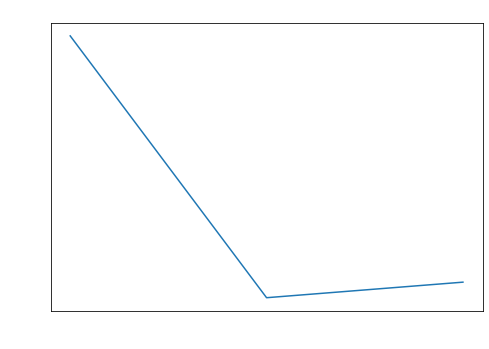

In [87]:
fig = plt.figure()
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
ax = fig.add_axes([0,0,1,1])
ax.plot(total_losses)
ax.set_title("Loss over time")
ax.set_xlabel("Epoch")
ax.set_ylabel("Average Loss")
plt.show()

# print(xtrain[1])

Question 5
We load the MNIST dataset and create the hidden layer and output layer

In [7]:
(xtrain, ytrain), (xval, yval), num_cls = data.load_mnist()
tensor_parameters = {
    "x": xtrain[0],
    "w": np.random.rand(xtrain.shape[1], 300),
    "b": np.zeros((300,)),
    "k1": np.zeros((300,)),
    "h": np.zeros((300,)),
    "v": np.random.rand(300,10),
    "c": np.zeros((10,)),
    "k2": np.zeros((10,)),
    "s": np.zeros((10,)),
    "l": np.zeros((10,)),
    "output": ytrain[0]
}

Visualize data

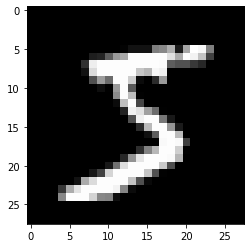

In [6]:
img = xtrain[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show()

Create forward prop

In [8]:
def tensor_forwardprop(t_params):
    new_params = t_params
    new_params["k1"] = (t_params["x"].dot(t_params["w"])) + t_params["b"]
    new_params["h"] = 1/(1 + np.exp(-new_params["k1"]))
    new_params["k2"] = (new_params["h"].dot(t_params["v"])) + t_params["c"]
    # for i in range(new_params["k2"].shape[0]):
    #     new_params["s"][i] = softmax(new_params["k2"][i], new_params["k2"])
    new_params["s"] = scipy.special.softmax(new_params["k2"])
    new_params["l"][t_params["output"]] = loss(new_params["s"][t_params["output"]],1,0)
    return new_params

In [9]:
test_tensor = tensor_forwardprop(tensor_parameters)
print(test_tensor["l"])

[0.         0.         0.         0.         0.         2.43717164
 0.         0.         0.         0.        ]


Create back prop and grad descent

In [35]:
def tensor_backprop(t_params):
    grads_bp = {
        "y": np.zeros((10,)),
        "k2": np.zeros((10,)),
        "c": np.zeros((10,)),
        "v": np.zeros((300,10)),
        "h": np.zeros((300,)),
        "k1": np.zeros((300,)),
        "b": np.zeros((300,)),
        "w": np.zeros((784,300))
    }
    grads_bp["y"] = -1/(t_params["s"])
    for i in range(grads_bp["k2"].shape[0]):
        if i == t_params["output"]:
            grads_bp["k2"][i] = grads_bp["y"][t_params["output"]]*((t_params["s"][t_params["output"]])*(1-(t_params["s"][t_params["output"]])))
        else:
            grads_bp["k2"][i] = grads_bp["y"][t_params["output"]]*((t_params["s"][t_params["output"]])*(0-(t_params["s"][i])))
    grads_bp["c"] = grads_bp["k2"]
    grads_bp["v"] = t_params["h"].reshape(300,1)*grads_bp["k2"].reshape(1,10)
    grads_bp["h"] = t_params["v"]@grads_bp["k2"]
    grads_bp["k1"] = grads_bp["h"]*(t_params["h"]*(1-t_params["h"]))
    grads_bp["b"] = grads_bp["k1"]
    grads_bp["w"] = t_params["x"].reshape(784,1)@grads_bp["k1"].reshape(1,300)
    # grads_bp["k2"] = grads_bp["y"][t_params["output"]]*((t_params["softmax"][t_params["output"]])*(1-(t_params["softmax"])))
    # grads["doi"].append(grads["dyi"][0]*((params["softmax"][0])*(0-(params["softmax"][1]))))
    return grads_bp
def tensor_gradient_descent(grads, t_params, learning_rate):
    t_params["w"] = t_params["w"] - learning_rate*grads["w"]
    t_params["v"] = t_params["v"] - learning_rate*grads["v"]
    t_params["b"] = t_params["b"] - learning_rate*grads["b"]
    t_params["c"] = t_params["c"] - learning_rate*grads["c"]
    return t_params

In [34]:
test_grads_bp = tensor_backprop(test_tensor)

[-1.85870188e+01 -3.10769664e+04 -1.88286281e+03 -4.92220220e+03
 -4.18200011e+03 -1.14406367e+01 -1.12942918e+06 -2.81303577e+03
 -1.44272111e+00 -6.08662387e+00] [5.38009892e-02 3.21781730e-05 5.31106140e-04 2.03161097e-04
 2.39120032e-04 8.74077228e-02 8.85403011e-07 3.55487837e-04
 6.93134656e-01 1.64294693e-01] [-0.94619901 -0.99996782 -0.99946889 -0.99979684 -0.99976088 -0.91259228
 -0.99999911 -0.99964451 -0.30686534 -0.83570531]


ValueError: array must be at least 2-d

In [24]:
print(test_grads_bp["y"])
print(test_grads_bp["k2"])

[-1.85870188e+01 -3.10769664e+04 -1.88286281e+03 -4.92220220e+03
 -4.18200011e+03 -1.14406367e+01 -1.12942918e+06 -2.81303577e+03
 -1.44272111e+00 -6.08662387e+00]
[ 5.38009892e-02  3.21781730e-05  5.31106140e-04  2.03161097e-04
  2.39120032e-04 -9.12592277e-01  8.85403011e-07  3.55487837e-04
  6.93134656e-01  1.64294693e-01]


Batched forward and backward

In [20]:
b = np.zeros((ytrain.size, ytrain.max()+1))

In [21]:
res = b @ tensor_parameters["l"]

In [12]:
def numpy_sigmoid(x):
    return 1/(1 + np.exp(-x))

def batched_loss(s_values):
    return -np.log(s_values)
def batched_tensor_forward(t_params):
    inputs = t_params["x"]
    one_hot_vectors = np.zeros((t_params["output"].size, t_params["output"].max()+1))
    one_hot_vectors[np.arange(t_params["output"].size),t_params["output"]] = 1
    # return test_15*one_hot_vectors
    return batched_loss(np.sum(scipy.special.softmax(numpy_sigmoid((inputs@t_params["w"]) + t_params["b"].T)@t_params["v"] + t_params["c"].T)*one_hot_vectors,axis=1))

In [23]:
tensor_parameters_test = {
    "x": xtrain,
    "w": np.random.rand(xtrain.shape[1], 300),
    "b": np.zeros((300,1)),
    "k1": np.zeros((300,1)),
    "h": np.zeros((300,1)),
    "v": np.random.rand(300,10),
    "c": np.zeros((10,1)),
    "k2": np.zeros((10,1)),
    "s": np.zeros((10,1)),
    "l": np.zeros((10,1)),
    "output": ytrain
}

In [24]:
test_loss = batched_tensor_forward(tensor_parameters_test)

Batched backward

In [24]:
# def batched_tensor_forward(tensor_parameters_test):
#

Question 7. Analysis

Train network on MNIST, plot loss of each batch or  instance against the time step

In [13]:
(xtrain, ytrain), (xval, yval), num_cls = data.load_mnist(final=False)
w1 = np.random.rand(xtrain.shape[1], 300)
w2 = np.random.rand(300, 10)
# print(w1)
q7_parameters = {
    "x": xtrain[0],
    "w": w1,
    "b": np.zeros((300,)),
    "k1": np.zeros((300,)),
    "h": np.zeros((300,)),
    "v": w2,
    "c": np.zeros((10,)),
    "k2": np.zeros((10,)),
    "s": np.zeros((10,)),
    "l": np.zeros((10,)),
    "output": ytrain[0]
}

In [36]:
total_losses = []
total_losses_validation = []
for epoch in range(3):
    print(f"Epoch number {epoch}")
    losses = []
    losses_validation = []
    for j in range(xtrain.shape[0]):
        q7_parameters["x"] = xtrain[j]
        q7_parameters["output"] = ytrain[j]
        q7_parameters["l"] = np.zeros((10,))
        _temp_parameters = tensor_forwardprop(q7_parameters)
        q7_grads = tensor_backprop(_temp_parameters)
        q7_parameters = tensor_gradient_descent(q7_grads, _temp_parameters, 0.3)
        losses.append(q7_parameters["l"])
        
        
    for k in range(xval.shape[0]):
        q7_parameters["x"] = xval[k]
        q7_parameters["output"] = yval[k]
        q7_parameters["l"] = np.zeros((10,))
        q7_parameters = tensor_forwardprop(q7_parameters)
        losses_validation.append(q7_parameters["l"])
    total_losses.append(losses)
    total_losses_validation.append(losses_validation)


Epoch number 0
[[ 0.46286015  0.1700767   0.61988331 ...  0.6976628   0.13131587
   0.40742111]
 [ 0.49050969  0.47061897  0.27743521 ...  0.75437511  0.57917723
   0.61860941]
 [ 0.52576985  0.26828222  0.14813978 ...  0.79527116  0.34809617
   0.01295765]
 ...
 [ 0.34383586  0.50994401  0.58751565 ...  0.28964525  0.13108116
   0.90456209]
 [ 0.79875488 -0.11646781  0.52047743 ...  0.88687103  0.90041197
   0.28999803]
 [ 0.37106158 -0.23811271  0.91859032 ...  0.84990766  0.48522086
   0.91032151]]
[[ 0.76286015  0.1700767   0.61988331 ...  0.6976628   0.13131587
   0.40742111]
 [ 0.79050969  0.47061897  0.27743521 ...  0.75437511  0.57917723
   0.61860941]
 [ 0.82576985  0.26828222  0.14813978 ...  0.79527116  0.34809617
   0.01295765]
 ...
 [ 0.64383586  0.50994401  0.58751565 ...  0.28964525  0.13108116
   0.90456209]
 [ 1.09875488 -0.11646781  0.52047743 ...  0.88687103  0.90041197
   0.28999803]
 [ 0.67106158 -0.23811271  0.91859032 ...  0.84990766  0.48522086
   0.91032151]]
[

KeyboardInterrupt: 

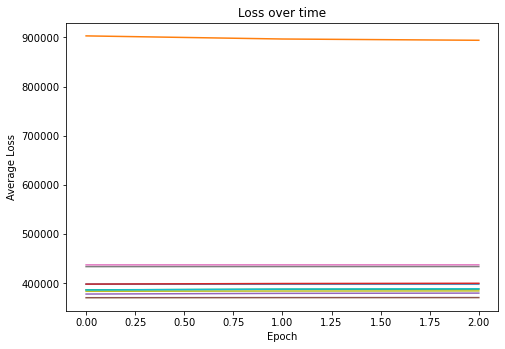

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
test = []
for i in range(len(total_losses)):
    test.append(sum(total_losses[i]))
# ax.plot(total_losses, label="training_loss")
# ax.plot(total_losses_validation, label="validation_loss")
ax.plot(test, label="training_loss")
ax.set_title("Loss over time")
ax.set_xlabel("Epoch")
ax.set_ylabel("Average Loss")
plt.show()

In [22]:
print(q7_parameters["l"])
print(1)

[ 0.          0.          0.          0.          0.          0.
  0.          0.         87.83642071  0.        ]
1


[array([0.22256541, 4.74944096, 4.39377011, 3.49146857, 2.87732224,
       4.33996579, 3.88853056, 3.71967832, 4.2052811 , 3.95730164]), array([0.22256541, 4.74944096, 4.39377011, 3.49146857, 2.87732224,
       4.33996579, 3.88853056, 3.71967832, 4.2052811 , 3.95730164]), array([0.22256541, 4.74944096, 4.39377011, 3.49146857, 2.87732224,
       4.33996579, 3.88853056, 3.71967832, 4.2052811 , 3.95730164]), array([0.22256541, 4.74944096, 4.39377011, 3.49146857, 2.87732224,
       4.33996579, 3.88853056, 3.71967832, 4.2052811 , 3.95730164]), array([0.22256541, 4.74944096, 4.39377011, 3.49146857, 2.87732224,
       4.33996579, 3.88853056, 3.71967832, 4.2052811 , 3.95730164])]
